In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import random as rd
#from tqdm import tqdm
from glob import glob

In [2]:
archivos=glob("*.txt")

In [3]:
archivos

['D2b27958064.txt',
 'D2b27958215.txt',
 'D2b27958866.txt',
 'D2b27959004.txt',
 'D2b27962611.txt']

In [4]:
Tiempos=[]
Intensidad=[]
Error=[]
n=len(archivos)
i=0
while(i<n):
    Datos=np.loadtxt(archivos[i])
    Tiempos.append(Datos[:,0])
    Intensidad.append(Datos[:,1])
    Error.append(Datos[:,2])
    i=i+1

In [5]:
from astropy.timeseries import LombScargle
import random

In [6]:
#Definicion de la funcion de fase
def phi(t,t0,p):
    return (((t-t0)/p)-int((t-t0)/p))

In [7]:
Frecuencias=[]
Power=[]
Fap=[]
Periodo=[]
for i in range(n):
    frecuency=np.linspace(1/50,1/(0.05),100000)
    power = LombScargle(Tiempos[i], Intensidad[i], Error[i]).power(frecuency)
    max_power = power.max()
    fap = LombScargle(Tiempos[i], Intensidad[i], Error[i]).false_alarm_probability(max_power)
    Frecuencias.append(frecuency)
    Power.append(power)
    Fap.append(fap)

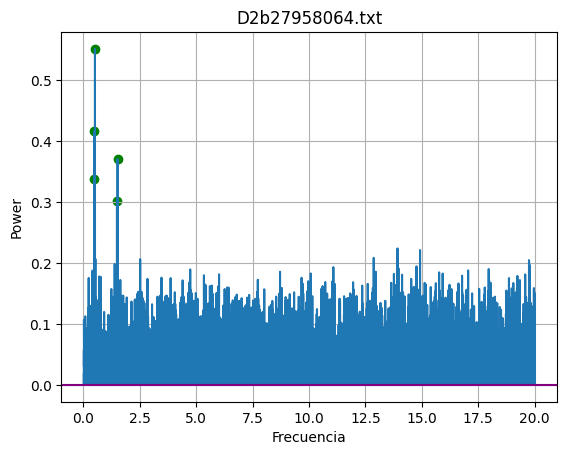

In [8]:
from scipy.signal import find_peaks
index = 0
plt.plot(Frecuencias[index],Power[index])
plt.axhline(Fap[index], color='purple', label='Fap')
plt.title(str(archivos[index]))
plt.xlabel('Frecuencia')
plt.ylabel('Power')
plt.grid()

peaks, _ = find_peaks(Power[index])

powerpeaks=Power[index][peaks]
power_order=np.sort(powerpeaks)[::-1]
n_peaks=5
ind_peaks=[]
Freq_peaks=[]
Power_peaks=[]
Periodo_peaks=[]
i=0
while(i<n_peaks):
    ind_peaks=np.where(Power[index]==power_order[i])[0][0]
    Freq_peaks.append(Frecuencias[index][ind_peaks])
    Periodo_peaks.append(1/Freq_peaks[-1])
    Power_peaks.append(Power[index][ind_peaks])
    i=i+1
plt.scatter(Freq_peaks,Power_peaks, color='g')

0.4868445497597106
0.9736890995194212
1.9473781990388424
3.8947563980776847
7.789512796155369


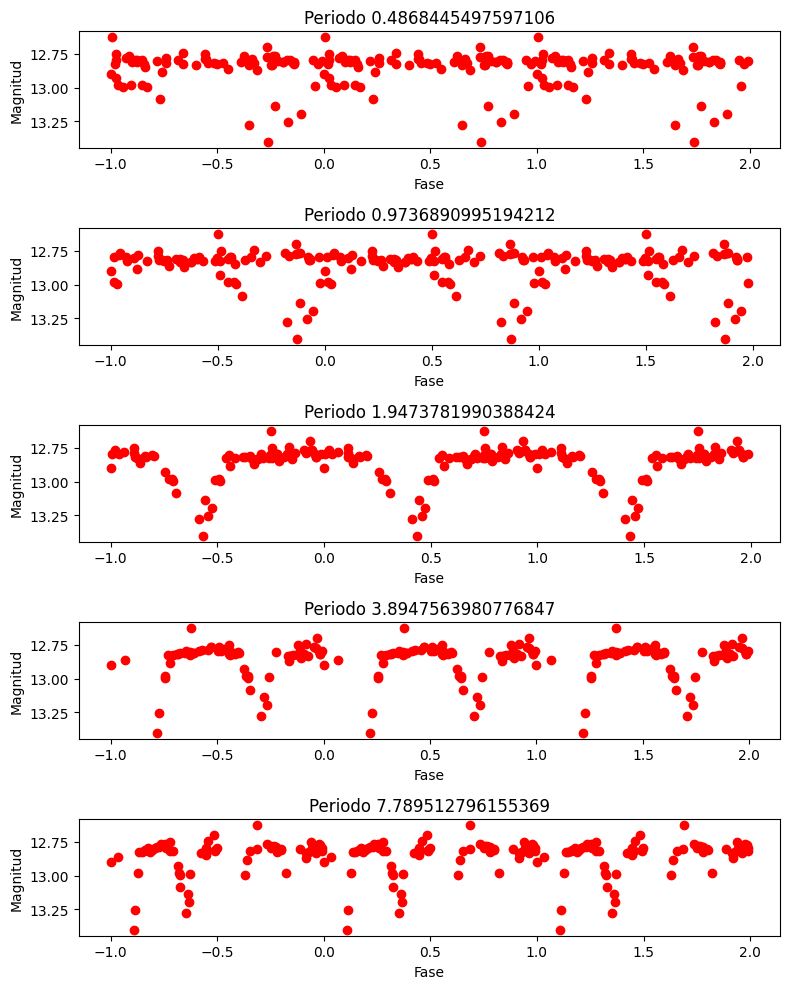

In [9]:
fig, axs = plt.subplots(n_peaks, figsize=(8, 10))  # Ajusta el tamaño de la figura según tu preferencia
a = 0
New_Periodos=np.array([Periodo_peaks[a]/4,Periodo_peaks[a]/2,Periodo_peaks[a],Periodo_peaks[a]*2,Periodo_peaks[a]*4])
for i_p, periodo in enumerate(New_Periodos):
    print(periodo)
    Tie = [phi(i, Tiempos[a][0], periodo) for i in Tiempos[a]]
    Tie=np.array(Tie)
    axs[i_p].scatter(Tie, Intensidad[a],c="r")
    axs[i_p].scatter(Tie+1, Intensidad[a],c="r")
    axs[i_p].scatter(Tie-1, Intensidad[a],c="r")
    axs[i_p].set_title('Periodo ' + str(periodo))
    axs[i_p].invert_yaxis()  # Voltea el eje y
    axs[i_p].set_xlabel('Fase')
    axs[i_p].set_ylabel('Magnitud')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

In [10]:

# Define the size of the list
size = len(archivos)
default_value = 0
 
# Create a list with the specified size filled with a default value using a for loop
k = [2]
for _ in range(size-1):
    k.append(default_value)
 
print(k)

[2, 0, 0, 0, 0]


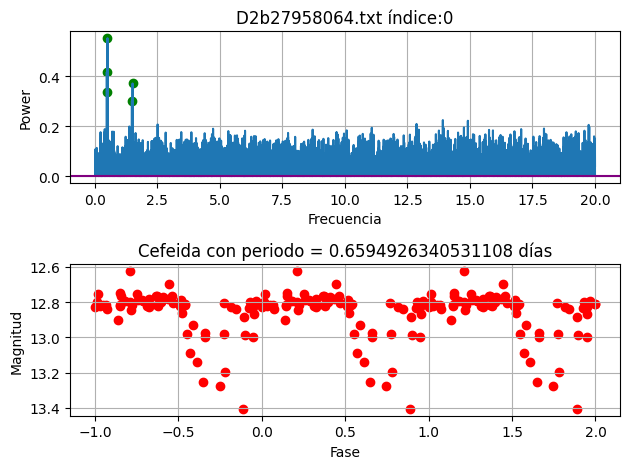

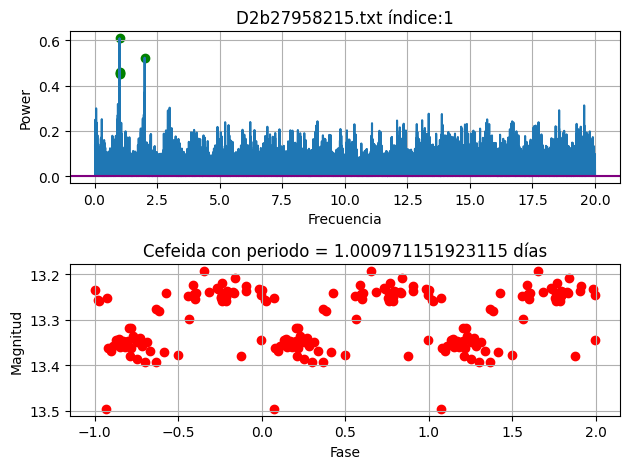

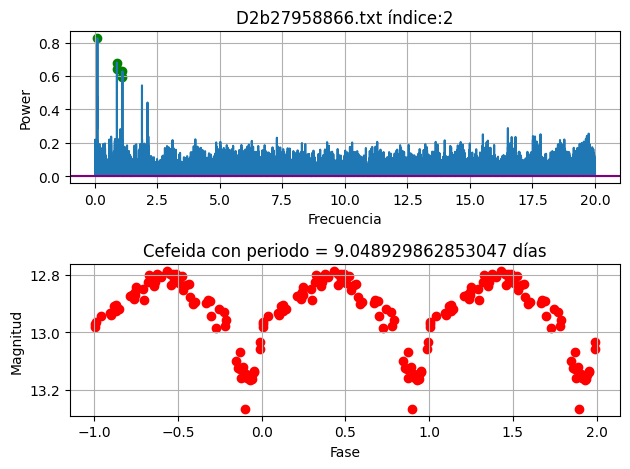

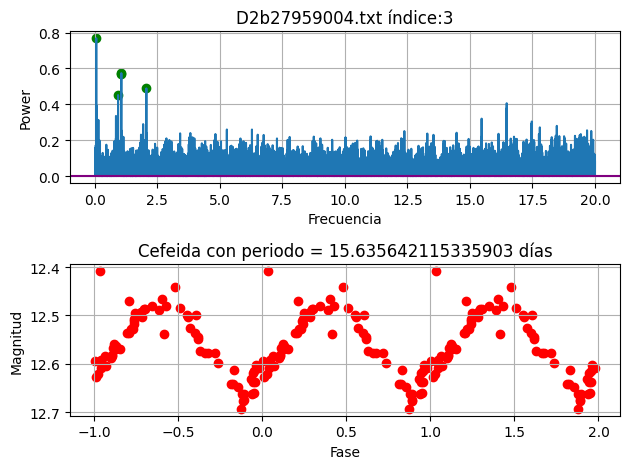

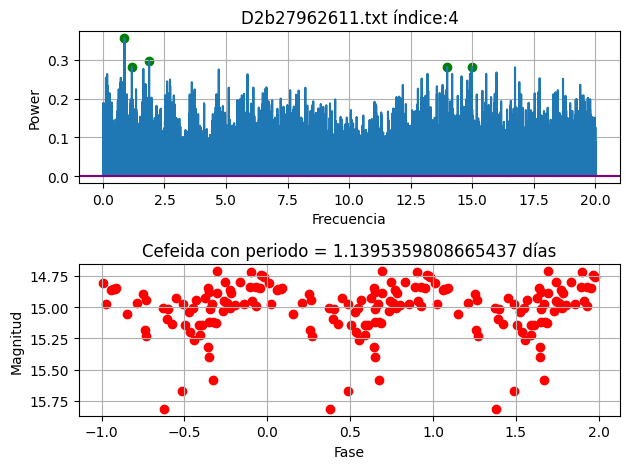

In [11]:
for i_freq,feq in enumerate(Frecuencias):
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(Frecuencias[i_freq],Power[i_freq])
    axs[0].axhline(Fap[i_freq], color='purple')
    axs[0].grid()

    axs[0].set_xlabel('Frecuencia')
    axs[0].set_ylabel('Power')
    axs[0].set_title(str(archivos[i_freq]) + ' índice:'+ str(i_freq))

    peaks, _ = find_peaks(Power[i_freq])
    powerpeaks=Power[i_freq][peaks]
    power_order=np.sort(powerpeaks)[::-1]
    n_peaks=5
    ind_peaks=[]
    Freq_peaks=[]
    Power_peaks=[]
    Periodo_peaks=[]
    i=0
    #filtered_stars = []
    indices_sirven = []
    stars_dict = {}
    while(i<n_peaks):
        if(power_order[i]>=Fap[i_freq]):
            ind_peaks=np.where(Power[i_freq]==power_order[i])[0][0]
            Freq_peaks.append(Frecuencias[i_freq][ind_peaks])
            Periodo_peaks.append(1/Freq_peaks[-1])
            Power_peaks.append(Power[i_freq][ind_peaks])
            #filtered_stars.append(archivos[i_freq])#[ind_peaks]) #[string for string, boolean in zip(archivos[i_freq], Periodo_peaks) if boolean]
        i=i+1
    axs[0].scatter(Freq_peaks,Power_peaks, color='g')
    #filtered_stars = [string for string, boolean in zip(archivos[i_freq], Power_peaks) if boolean]
    
    if(k[i_freq]<len(Periodo_peaks)):
        periodo=Periodo_peaks[k[i_freq]]
        Tie=(Tiempos[i_freq] % (periodo)) / (periodo)
        #filtered_stars.append(archivos[i_freq]) 
        #indices_sirven.append(Tie.index())
        #Tie = [phi(i, Tiempos[i_freq][0], Periodo[i_freq]) for i in Tiempos[i_freq]]
        #stars_dict.update({archivos[i_freq]:periodo})
        Tie=np.array(Tie)
        axs[1].scatter(Tie, Intensidad[i_freq],c="r")
        axs[1].scatter(Tie+1, Intensidad[i_freq],c="r")
        axs[1].scatter(Tie-1, Intensidad[i_freq],c="r")
        axs[1].set_title('Cefeida con periodo = ' + str(periodo) + ' días')
        axs[1].invert_yaxis()  # Voltea el eje y
        axs[1].set_xlabel('Fase')
        axs[1].set_ylabel('Magnitud')
        
    

    plt.tight_layout()
    plt.grid()

    
    plt.show()        